In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from data_preprocessing import *
from data_analysis import *
from hyperparameter_tuning import *

In [2]:
df = pd.read_csv('sales_forecasting.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
target_column = 'Item_Outlet_Sales'
df.drop(['Outlet_Identifier', 'Item_Identifier'], axis=1, inplace=True)

In [4]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
new_df, X, y = preprocess_data(df, target_column)
X_train, X_test, y_train, y_test = scale_encode_split(X, y)
save_preprocessed_data(X_train, X_test, y_train, y_test)

2024-01-16 15:17:27.611 
  command:

    streamlit run d:\Project\Internship\iNeuron\Automated_ML\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


None


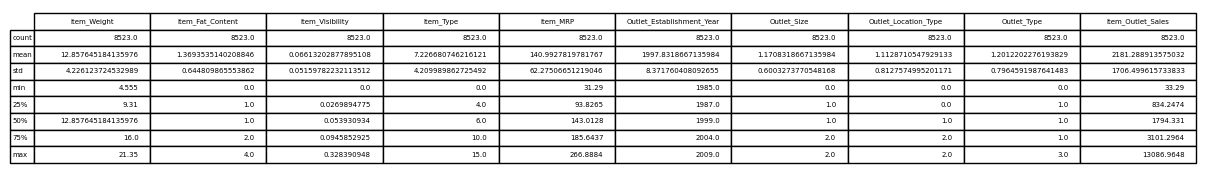

<Figure size 2500x2500 with 0 Axes>

In [7]:
describe = descriptive_analysis(df)
print(describe)
visualize_data(df)

In [8]:
best_model, best_model_name, best_model_score = tune_regression_model(X_train, y_train)

Tuning hyperparameters for Linear Regression...
Best Hyperparameters for Linear Regression: {}
Best MSE on Validation Set: -1459155.7700398613



In [9]:
best_model_name, best_model_score

('Linear Regression', -1459155.7700398613)

In [10]:
final_model(X, y, best_model)

In [7]:
print_regression_scores(best_model, X_test, y_test)

2024-01-16 15:26:34.662 
  command:

    streamlit run d:\Project\Internship\iNeuron\Automated_ML\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [9]:
new_df = pd.read_csv('Train.csv')
new_df.drop('ID', axis=1, inplace=True)

In [10]:
new_df, X, y = preprocess_data(new_df, 'Segmentation')
X_train, X_test, y_train, y_test = scale_encode_split(X, y)
save_preprocessed_data(X_train, X_test, y_train, y_test)
best_model, best_model_name, best_model_score = tune_classification_model(X_train, y_train)

Tuning hyperparameters for Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100}
Best Accuracy on Validation Set: 0.49813785359585444



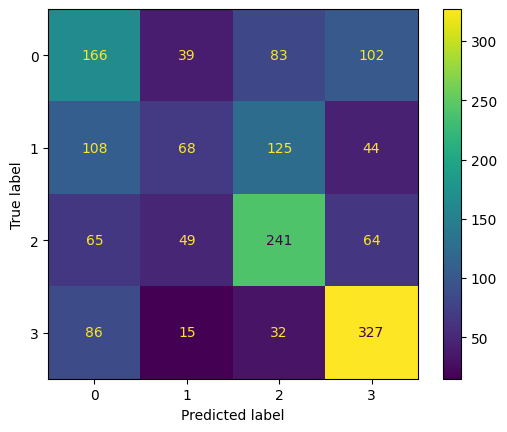


Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.43      0.41       390
           1       0.40      0.20      0.26       345
           2       0.50      0.58      0.54       419
           3       0.61      0.71      0.66       460

    accuracy                           0.50      1614
   macro avg       0.47      0.48      0.47      1614
weighted avg       0.48      0.50      0.48      1614



In [11]:
print_classification_scores(best_model, X_test, y_test)

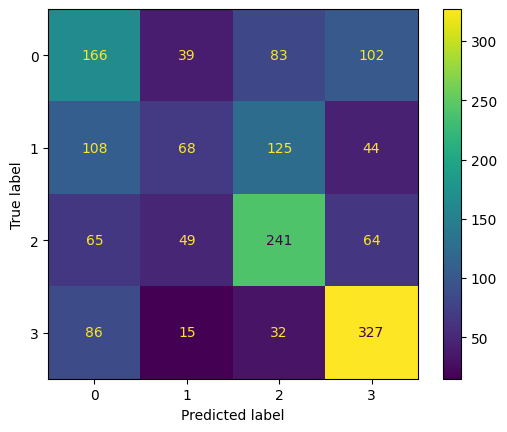

In [17]:
y_pred = best_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
# st.write("Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=best_model.classes_)
# st.pyplot(disp)
disp.plot().figure_.savefig('download/confusion_matrix.png')
# plt.savefig('download/confusion_matrix.png')

In [1]:
from pathlib import Path

Path("download").mkdir(parents=True, exist_ok=True)